# CosmicRayDataBase
## This is a free tool to create plots of the UHECR energy spectra
This software comes with absolutely no warranty.Please report any bugs to lukas.merten@rub.de

This is version1.2. From now on, even low energy data is available.

##### You can use CRDB.keys() to iterate over all keys

### List of available Experimants and keys

* AGASA (2003)             -- AGA03
* AMS ()                   -- AMS
* ATIC (2009)              -- ATIC
* Auger (2009)             -- AUG09
* Auger (2011)             -- AUG11
* BESS (2015)              -- BESS
* Casa MIA                 -- CAS
* CREAM                    -- CREAM
* GAMMA                    -- GAM
* HiRes-I Mono             -- HIRES1MONO
* HiRes-II Mono            -- HIRES2MONO
* HiRes-II Stereo          -- HIRSTEREO
* HiRes/MIA                -- HIRESMIA
* IceTop                   -- ICE
* Kascade (QGSJet)         -- KASQGS
* Kascade (Sibyll)         -- KASSIBYLL
* Kascade (2005)           -- KAS05
* KASCADE Grande (QGSJet2) -- GRANQGS2
* PAMELA                   -- PAMELA
* PAMELA Cato              -- PAMELA_CATO
* Telecope array           -- TA
* TibetIII (QGSJet+HD)     -- TIBETIII1
* TibetIII (QGSJet+PD)     -- TIBETIII2
* TibetIII (Sibyll+HD)     -- TIBETIII3
* Tunka133                 -- TUNKA


In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
#import seaborn as sns
import matplotlib.cm as cm
import cPickle

# Loading the Database as CRDB
with open("../CRDB.ppd", 'r') as f:
    CRDB = cPickle.load(f)

# Dictionairy for units
UnitDict = {"eV":[1., "eV"], "keV":[1e3, "keV"], "MeV":[1e6, "MeV"]
, "GeV":[1e9, "GeV"], "TeV":[1e12, "TeV"], "PeV":[1e15, "PeV"]
, "EeV":[1e18, "EeV"], "erg":[6.24150934e11, "erg"], "J":[1.602e19, "J"]}

### User configuration

In [2]:
# specify name and format for the plot
savePlot = "../Examples/Plot.pdf"
# specify name and format for the tex file
saveTex = "../Examples/CRDB.tex"
# Choose the experiments via the aforemantioned keys
Experiment = ["PAMELA", "AUG11", "GRANQGS2", "CAS", "CREAM", "KASQGS"]#"KASSIBYLL","PAMELA_CATO",
# Choose the weighting of the Flux dN/dE * E**weight
weight = 2.7
# Choose the units
unit = "eV"

<IPython.core.display.Javascript object>


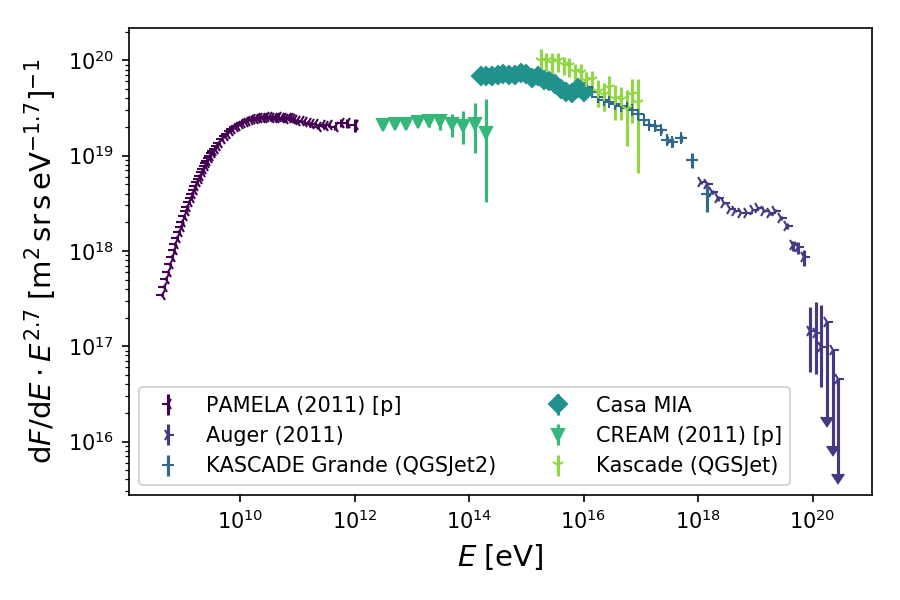

In [3]:
########################################################################
#magic happens here
markers = ['3', '4', '+', 'D', 'v', '1', 'h', '*', '<', '2', 's', 'H', 'x', 'p', '>', '.', 'd', '^']
#colors = ['b', 'g', 'y', 'k', 'r', 'c', 'm']
colors = []
for i, c in enumerate(Experiment):
#for i, j in enumerate(CRDB.keys()):
    colors.append(cm.viridis(i/float(len(Experiment)), 1))
    #colors.append(cm.viridis(i/float(25), 1))

Unit = UnitDict[unit][0]
UnitName = UnitDict[unit][1]
Experiment_pyList = [] # list of experiment names as used in the legend
Citation = []
plt.figure(figsize=(6, 4.))
for j,i in enumerate(Experiment):
#for j,i in enumerate(CRDB.keys()):
    E = CRDB[i]["DATA"]["E"]/Unit
    F = CRDB[i]["DATA"]["F"]*Unit
    F_stat = CRDB[i]["DATA"]["F_stat"]*Unit
    F_low = CRDB[i]["DATA"]["F_low"]*Unit
    F_up = CRDB[i]["DATA"]["F_up"]*Unit
    label = CRDB[i]["METADATA"]["Legend"]
    wx, wy = str(weight), str(1-weight)
    fmt = markers[j%len(markers)]
    #color = colors[j%len(colors)]
    color = colors[j]
    #color = sns.set_palette('dark', 20)
    for n, c in enumerate(F_up):
        if n>0:
            label=None
        if str(c)!='nan':
            plt.errorbar(E[n], F[n]*E[n]**weight, 
                         yerr=[[(F_low[n]**2.+F_stat[n]**2.)**0.5*E[n]**weight], 
                               [(F_up[n]**2.+F_stat[n]**2.)**0.5*E[n]**weight]], 
                         fmt=fmt, color=color, label=label)
        else:
            plt.errorbar([E[n]], [F[n]*E[n]**weight], [F[n]*E[n]**weight*0.9], 
                         fmt=fmt, uplims=True, color=color, label=label)
    Citation.append(CRDB[i]["METADATA"]["Legend"])
    Citation.append(" --- \cite{")
    Citation.append(CRDB[i]["METADATA"]["Cite"])
    Citation.append("}, ")
    Experiment_pyList.append(CRDB[i]["METADATA"]["Legend"])
plt.legend(ncol=2, loc='best', fontsize=10)
plt.loglog(nonposy='clip')
plt.xlabel(r"$E\; [\mathrm{"+UnitName+"}]$", fontsize=14)
plt.ylabel(r"$\mathrm{d}F/\mathrm{d}E\cdot E^{"+wx+"}\; [\mathrm{m^2\, sr\, s\, "+UnitName+"^{"+wy+"}]^{-1}}$", fontsize=14)
#plt.savefig(savePlot)
plt.tight_layout()
plt.show()
#plt.close()


#Citation[len(Citation)-1] = "}"
#citeString = ''.join(Citation)
#
#with open(saveTex, 'w') as f:
#    f.write(
#    "\\"+"begin{figure}[htb]\n"
#    +"\centering\n"
#    +"\includegraphics[width=\linewidth]{"+savePlot+"}\n"
#    +"\caption{List of Experiments: "+citeString+"}\n"
#    +"\label{fig:CRDB}\n"
#    +"\end{figure}"
#    )